In [1]:
#importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the dataset
df_train=pd.read_csv('/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/train.csv')

In [3]:
df_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_train.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.028640,...,14.24,17.37,96.59,623.7,0.11660,0.2685,0.2866,0.09173,0.2736,0.07320
385,90291,M,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.2675,0.13590,0.2477,0.06836
386,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.025340,...,13.13,19.29,87.65,529.9,0.10260,0.2431,0.3076,0.09140,0.2677,0.08824
387,902976,B,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,...,15.51,19.97,99.66,745.3,0.08484,0.1233,0.1091,0.04537,0.2542,0.06623
388,903011,B,11.27,15.50,73.38,392.0,0.08365,0.11140,0.10070,0.027570,...,12.04,18.93,79.73,450.0,0.11020,0.2809,0.3021,0.08272,0.2157,0.10430


In [5]:
df_train.shape

(389, 32)

In [6]:
#concise summary of our dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       389 non-null    int64  
 1   diagnosis                389 non-null    object 
 2   radius_mean              389 non-null    float64
 3   texture_mean             389 non-null    float64
 4   perimeter_mean           389 non-null    float64
 5   area_mean                389 non-null    float64
 6   smoothness_mean          389 non-null    float64
 7   compactness_mean         389 non-null    float64
 8   concavity_mean           389 non-null    float64
 9   concave points_mean      389 non-null    float64
 10  symmetry_mean            389 non-null    float64
 11  fractal_dimension_mean   389 non-null    float64
 12  radius_se                389 non-null    float64
 13  texture_se               389 non-null    float64
 14  perimeter_se             3

In [7]:
#Generating descriptive statistics
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,389.0,2.703005e+07,1.111087e+08,8670.000000,862965.000000,891703.000000,8.812877e+06,9.010343e+08
radius_mean,389.0,1.433808e+01,3.573300e+00,6.981000,11.810000,13.500000,1.626000e+01,2.811000e+01
texture_mean,389.0,1.898018e+01,4.146792e+00,9.710000,15.900000,18.660000,2.158000e+01,3.928000e+01
perimeter_mean,389.0,9.343784e+01,2.461272e+01,43.790000,75.710000,87.210000,1.081000e+02,1.885000e+02
area_mean,389.0,6.747398e+02,3.574602e+02,143.500000,428.900000,562.100000,8.177000e+02,2.499000e+03
smoothness_mean,389.0,9.690951e-02,1.394563e-02,0.062510,0.086940,0.096760,1.062000e-01,1.447000e-01
compactness_mean,389.0,1.069978e-01,5.512219e-02,0.019380,0.066360,0.095800,1.336000e-01,3.454000e-01
concavity_mean,389.0,9.432745e-02,8.202390e-02,0.000000,0.030360,0.069500,1.379000e-01,4.268000e-01
concave points_mean,389.0,5.190124e-02,3.979646e-02,0.000000,0.020740,0.037800,7.944000e-02,2.012000e-01
symmetry_mean,389.0,1.831861e-01,2.868909e-02,0.116700,0.163400,0.180900,1.967000e-01,3.040000e-01


# EDA

Let's find how many have benignant and malignant tumors

In [8]:
#finging the values
df_train.diagnosis.value_counts()

B    219
M    170
Name: diagnosis, dtype: int64

In [9]:
df_train['diagnosis']=df_train['diagnosis'].map({'B':1,'M':0})
df_train

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.147100,...,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.070170,...,24.99,23.41,158.80,1956.0,0.12380,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.127900,...,23.57,25.53,152.50,1709.0,0.14440,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.105200,...,14.91,26.50,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.104300,...,22.54,16.67,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,902727,1,13.28,13.72,85.79,541.8,0.08363,0.08575,0.05077,0.028640,...,14.24,17.37,96.59,623.7,0.11660,0.2685,0.2866,0.09173,0.2736,0.07320
385,90291,0,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,...,15.79,31.71,102.20,758.2,0.13120,0.1581,0.2675,0.13590,0.2477,0.06836
386,902975,1,12.21,14.09,78.78,462.0,0.08108,0.07823,0.06839,0.025340,...,13.13,19.29,87.65,529.9,0.10260,0.2431,0.3076,0.09140,0.2677,0.08824
387,902976,1,13.88,16.16,88.37,596.6,0.07026,0.04831,0.02045,0.008507,...,15.51,19.97,99.66,745.3,0.08484,0.1233,0.1091,0.04537,0.2542,0.06623


In [10]:
df_train.diagnosis.value_counts()

1    219
0    170
Name: diagnosis, dtype: int64

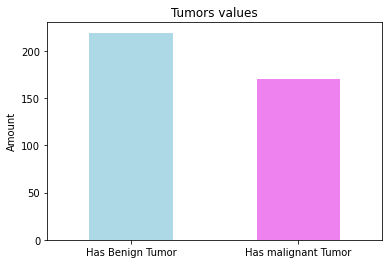

In [11]:
#plotting bar chart
fig=df_train.diagnosis.value_counts().plot(kind='bar',color=["lightblue","violet"])
fig.set_xticklabels(labels=['Has Benign Tumor',"Has malignant Tumor"],rotation=0);
plt.title("Tumors values")
plt.ylabel("Amount");

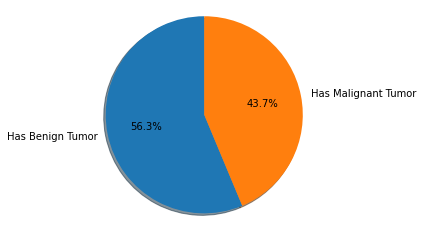

In [12]:
#visualising in pie chart
labels="Has Benign Tumor","Has Malignant Tumor"
explode=(0,0)

fig1, ax1 = plt.subplots()
ax1.pie(df_train.diagnosis.value_counts(),explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

In [13]:
df_train[df_train.radius_mean>=23].count()

id                         9
diagnosis                  9
radius_mean                9
texture_mean               9
perimeter_mean             9
area_mean                  9
smoothness_mean            9
compactness_mean           9
concavity_mean             9
concave points_mean        9
symmetry_mean              9
fractal_dimension_mean     9
radius_se                  9
texture_se                 9
perimeter_se               9
area_se                    9
smoothness_se              9
compactness_se             9
concavity_se               9
concave points_se          9
symmetry_se                9
fractal_dimension_se       9
radius_worst               9
texture_worst              9
perimeter_worst            9
area_worst                 9
smoothness_worst           9
compactness_worst          9
concavity_worst            9
concave points_worst       9
symmetry_worst             9
fractal_dimension_worst    9
dtype: int64

Differentiating radius_mean with numbers

<AxesSubplot:ylabel='Frequency'>

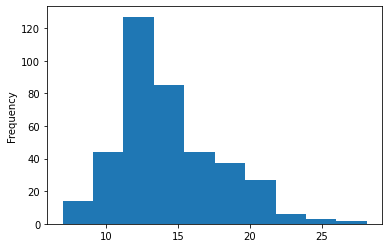

In [14]:
df_train.radius_mean.plot(kind='hist')

# Visualize the Data

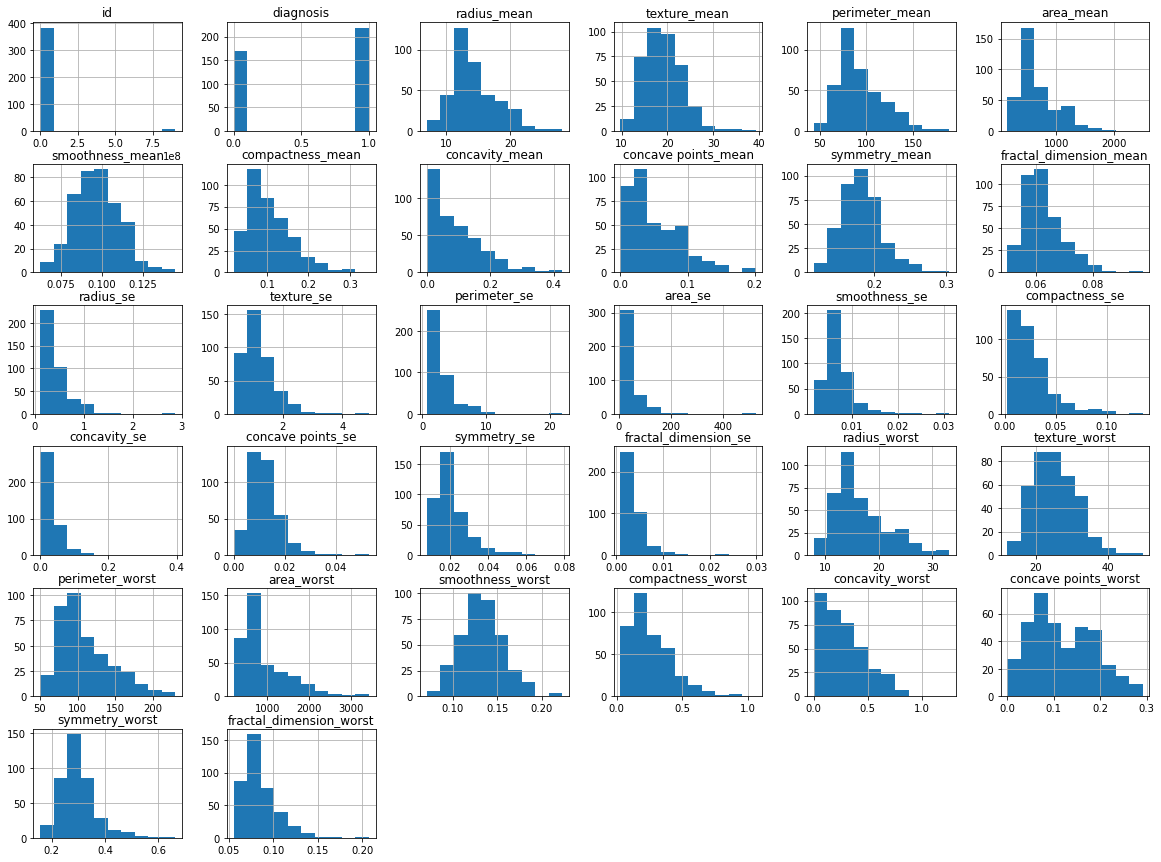

In [15]:
#Visualise the data using histograms
#A histogram is a plot that lets you discover,and show, the underlying frequency distribution
num_bins=10
df_train.hist(bins=num_bins,figsize=(20,15))
plt.show()

# Data Preprocessing

In [16]:
#Checking for null values
df_train.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

There is no null values

# Modelling

In [17]:
#Creating dependent and independent matrix of features 
y=df_train['diagnosis'].values
x=df_train.drop('diagnosis',axis=1).values

In [18]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
len(x_train),len(x_test),len(y_test),len(y_train)

(311, 78, 78, 311)

# Standardizing the features

In [20]:
#standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sn

# Logistic Regression

0.9358974358974359


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

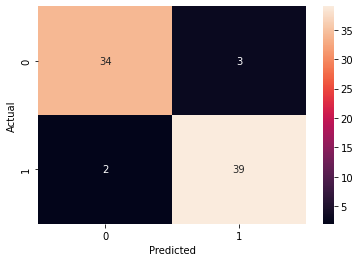

In [22]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(random_state=0)
#Train the model
log_clf.fit(x_train,y_train)
#Test it using the test dataset
y_pred1=log_clf.predict(x_test)

#Model Evaluation
print(accuracy_score(y_test,y_pred1))
confusion_matrix=pd.crosstab(y_test,y_pred1,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# KNeighbors Classifier

0.9615384615384616


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

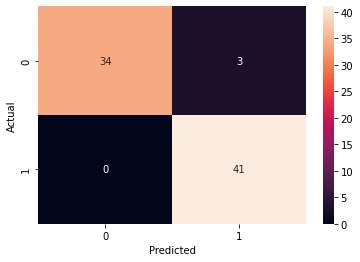

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=5,p=1)
knn_clf.fit(x_train,y_train)
y_pred2=knn_clf.predict(x_test)

print(accuracy_score(y_test,y_pred2))
confusion_matrix=pd.crosstab(y_test,y_pred2,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# SVM

0.9358974358974359


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

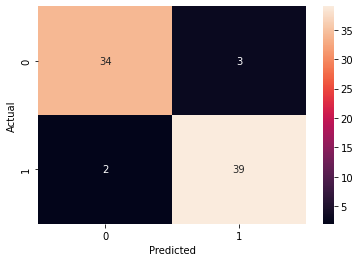

In [24]:
from sklearn.svm import SVC
svc_clf=SVC(kernel='linear',random_state=0)
svc_clf.fit(x_train,y_train)
y_pred3=svc_clf.predict(x_test)

print(accuracy_score(y_test,y_pred3))
confusion_matrix=pd.crosstab(y_test,y_pred3,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# Kernel SVM

0.9358974358974359


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

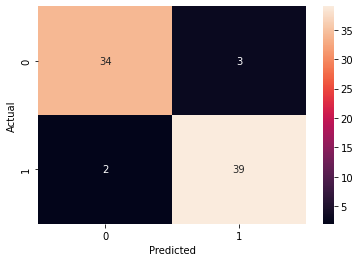

In [25]:
from sklearn.svm import SVC
svc_clf1=SVC(kernel='rbf',random_state=1)
svc_clf1.fit(x_train,y_train)
y_pred4=svc_clf1.predict(x_test)

print(accuracy_score(y_test,y_pred4))
confusion_matrix=pd.crosstab(y_test,y_pred4,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# Naive Bayes

0.9102564102564102


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

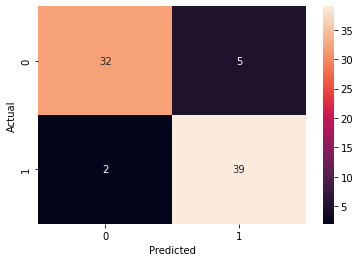

In [26]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)
y_pred5=nb_clf.predict(x_test)

print(accuracy_score(y_test,y_pred5))
confusion_matrix=pd.crosstab(y_test,y_pred5,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# Decision Tree

0.9102564102564102


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

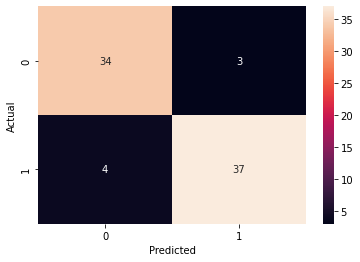

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf=DecisionTreeClassifier(criterion='gini',random_state=0)
dtc_clf.fit(x_train,y_train)
y_pred6=dtc_clf.predict(x_test)

print(accuracy_score(y_test,y_pred6))
confusion_matrix=pd.crosstab(y_test,y_pred6,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# Random Forest

0.9358974358974359


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

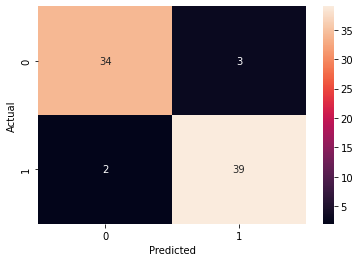

In [28]:
from sklearn.ensemble import RandomForestClassifier
rand_clf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=2)
rand_clf.fit(x_train,y_train)
y_pred7=rand_clf.predict(x_test)

print(accuracy_score(y_test,y_pred7))
confusion_matrix=pd.crosstab(y_test,y_pred7,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(confusion_matrix,annot=True)

# Competition Prediction

In [29]:
#import dataset
df_train['diagnosis']=df_train['diagnosis'].map({1:'B',0:'M'})
df_test=pd.read_csv("/kaggle/input/tfug-prayagraj-breast-cancer-diagnostic/test.csv")
df_test

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90312,19.550,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.820,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
1,90317302,10.260,12.22,65.75,321.6,0.09996,0.07542,0.01923,0.01968,0.1800,...,11.380,15.65,73.23,394.5,0.13430,0.16500,0.08615,0.06696,0.2937,0.07722
2,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.00000,0.1985,...,10.170,22.80,64.01,317.0,0.14600,0.13100,0.00000,0.00000,0.2445,0.08865
3,903507,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,...,21.200,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190
4,903516,21.610,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,26.230,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,926424,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
176,926682,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
177,926954,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
178,927241,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


Let's check how many NaN values for test dataset

In [30]:
df_test.isnull().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [31]:
pred=knn_clf.predict(x_test)

In [32]:
df_test.columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [33]:
x_test_data=df_test.values
output=knn_clf.predict(x_test_data)
print(len(output))

180


In [34]:
my_submission=pd.DataFrame({'id':df_test['id'],'diagnosis':output})
my_submission['diagnosis']=my_submission['diagnosis'].map({1:'B',0:'M'})
my_submission.head()

,id,diagnosis
0,90312,M
1,90317302,M
2,903483,M
3,903507,M
4,903516,M


In [35]:
filename='ML_Olympaid_breastCancer predictions.csv'
my_submission.to_csv(filename,index=False)
print('Saved File:'+filename)

Saved File:ML_Olympaid_breastCancer predictions.csv
